#### Visualisierung einiger Motife

Die Tabellen unten sind folgendermaßen zu verstehen:

 - **hit**: ist eine gefundene Teilstruktur in CS219 Alphabet
 - **pdb**: pdb-id konkateniert mit Domänenbezeichnung
 - **c**: class (nach CATH Topologie)
 - **a**: Architecture (nach CATH Topologie)
 - **t**: Topologie/Fold (nach CATH Topologie)
 - **h**: Homologous superfamily (nach CATH Topologie)
 - **N**: Anzahl der Zeichen der Teilstruktur :hit
 - **pdb_seq**: Aminosäuresequenz
 - **cs219**: Sequenz des HMM in CS219 Alphabet
 - **pdb_seq_len**: Anzahl der Zeichen in :pdb_seq
 - **cs219_len**: Anzahl der Zeichen in :cs219
 - **start**: Startposition des :hit in :cs219
 - **end**: Endposition des :hit in :cs219
 - **pdb_interval**: Start und Endpositionen der Domäne :pdb  in der Gesamtsequenz des zugehörigen Proteins
 - **hit_interval**: Start und Endpositionen des :hit in :pdb_interval
 
Zum Beispiel für index 7733, die Proteinstruktur (:pdb_seq) der Domäne 1krlA00 (:pdb) erstreckt sich über die Zeichen 101-144. Es wurde eine Teilstruktur der Länge 37 gefunden, welche in der CS219-Sequenz an der Position 5-41 vorkommt. In der Proteinstruktur kommt diese Teilstruktur entsprechend an der Position 105:141 vor.
 

In [1]:
%pylab inline
import pandas as pd
pd.options.display.max_colwidth = 80
from ipymol import viewer as pymol
pymol.start()

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gen_pymol_session(pdb1, pdb2, pos1, pos2):
    pymol.reinit()
    pymol.do("fetch %s, async=0" % pdb1)
    pymol.do("color palegreen, %s" % pdb1)
    pymol.do("fetch %s, async=0" % pdb2)
    pymol.do("color lightblue, %s" % pdb2)
    pymol.do("select frag1_sele, " + pdb1 + (" and resi %s-%s" % pos1))
    pymol.do("select frag2_sele, " + pdb2 + (" and resi %s-%s" % pos2))
    pymol.do("color green, frag1_sele")
    pymol.do("color blue, frag2_sele")
    pymol.do("super frag1_sele, frag2_sele")
    pymol.do("copy_to frag1_sele, frag1")
    pymol.do("copy_to frag2_sele, frag2")
    pymol.do("bg_color white")
    pymol.do("hide everything")
    pymol.do("show cartoon")
    pymol.do("ray")
    pymol.show()

In [3]:
df = pd.read_csv("../data/pdb_str/cs219_found_hits.csv", sep=",").drop(columns=["pdb_seq", "cs219"]).rename(columns={"range": "pdb_interval", "range_scaled" : "hit_interval"})
df = df[df.N > 10]
df = df[["index", "Number_of_Seq"] + list(df.columns[0:-2].values)]
df.head()

,index,Number_of_Seq,hit,pdb,c,a,t,h,N,pdb_seq_len,cs219_len,start,end,pdb_interval,hit_interval
0,3255,2,╕VF5'éë)KF╖≡≤⌐≈⌠≈,2avtA02,3,70,10,10,17,199,199,39,55,"139-204:A,245-377:A",177:193
1,3255,2,╕VF5'éë)KF╖≡≤⌐≈⌠≈,4trtA02,3,10,150,10,17,119,119,45,61,123-241:A,167:183
2,2384,3,ë)KF╖≡≤⌐≈⌠≈≈,2avtA02,3,70,10,10,12,199,199,45,56,"139-204:A,245-377:A",183:194
3,2384,3,ë)KF╖≡≤⌐≈⌠≈≈,1vpkA02,3,10,150,10,12,128,128,55,66,120-247:A,174:185
4,2384,3,ë)KF╖≡≤⌐≈⌠≈≈,2xurA02,3,10,150,10,12,124,124,52,63,124-247:A,175:186


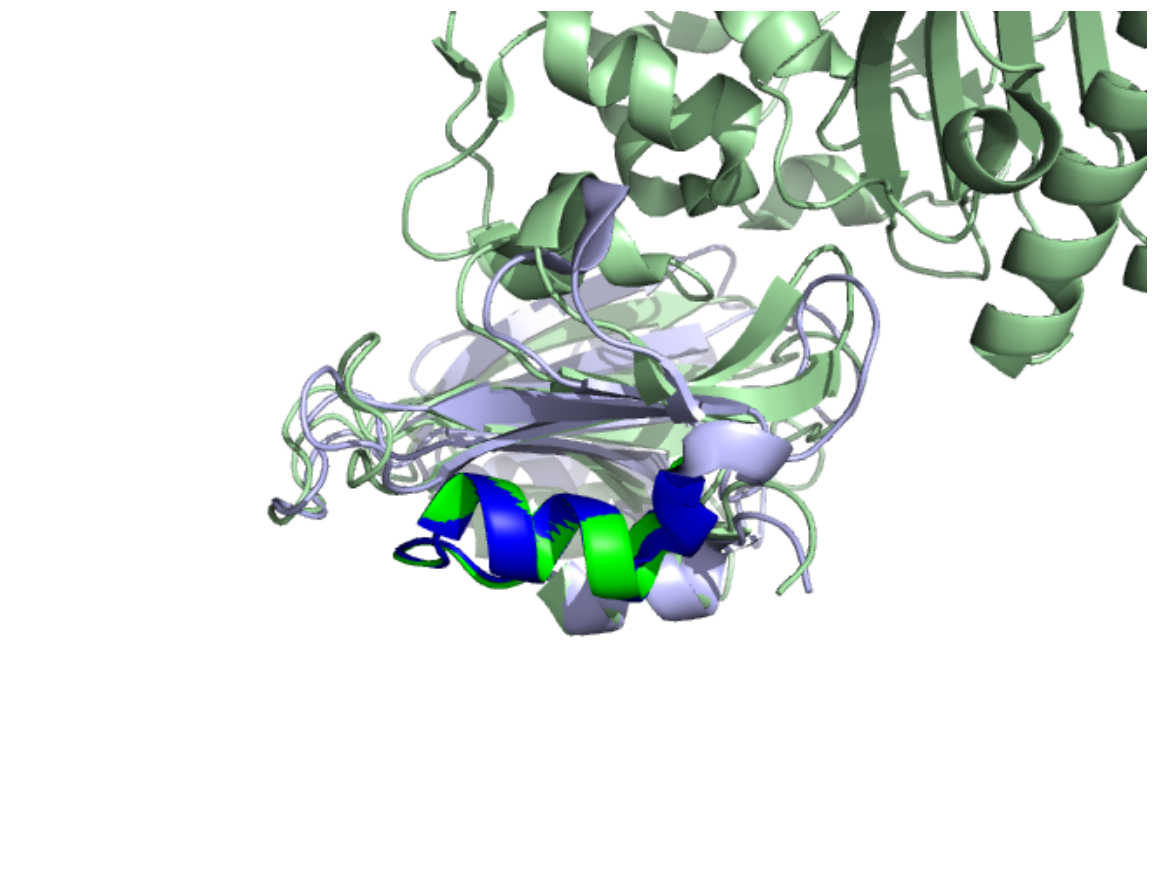

In [4]:
gen_pymol_session("1xxm", "3gmv", (1013, 1027), (13,27) )

In [5]:
df_sample=df[(df.pdb == "1fuwA00") |  (df.pdb == "1krlA00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
9014,")/24!(/(6,(3(17'4,+)1'27/'(45)!)4,,)+0!$3",1fuwA00,3,10,450,51,91,1-91:A,51:91
9015,")/24!(/(6,(3(17'4,+)1'27/'(45)!)4,,)+0!$3",1krlA00,2,20,25,1,41,101-144:A,101:141


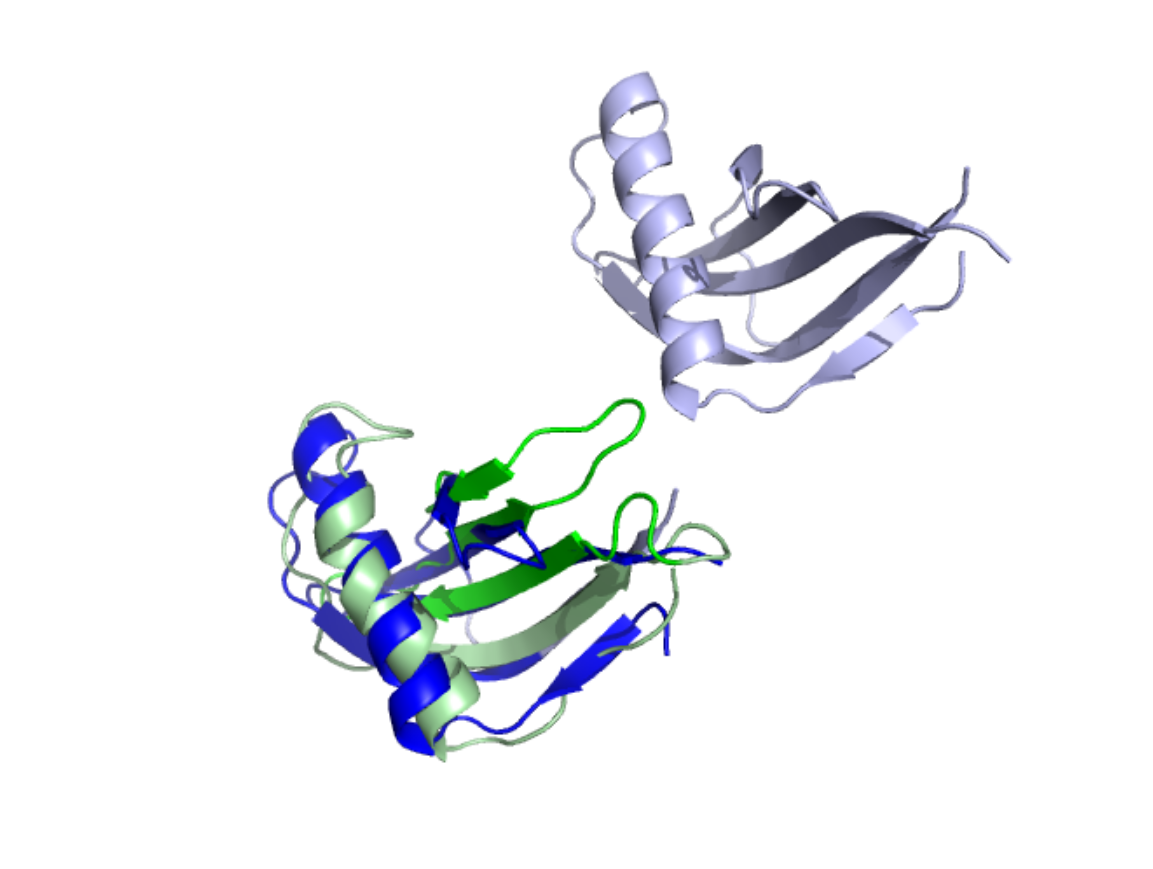

In [6]:
gen_pymol_session("1fuw", "1krl", (51, 91), (101,141))

In [7]:
df_sample=df[(df.pdb == "3l0iA01") |  (df.pdb == "2wwxB00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
6954,"/,!36)35)2/0,/0144,#'0107",2wwxB00,1,20,1260,1,25,334-533:B,334:358
6955,"/,!36)35)2/0,/0144,#'0107",3l0iA01,1,20,120,105,129,215-399:A,319:343


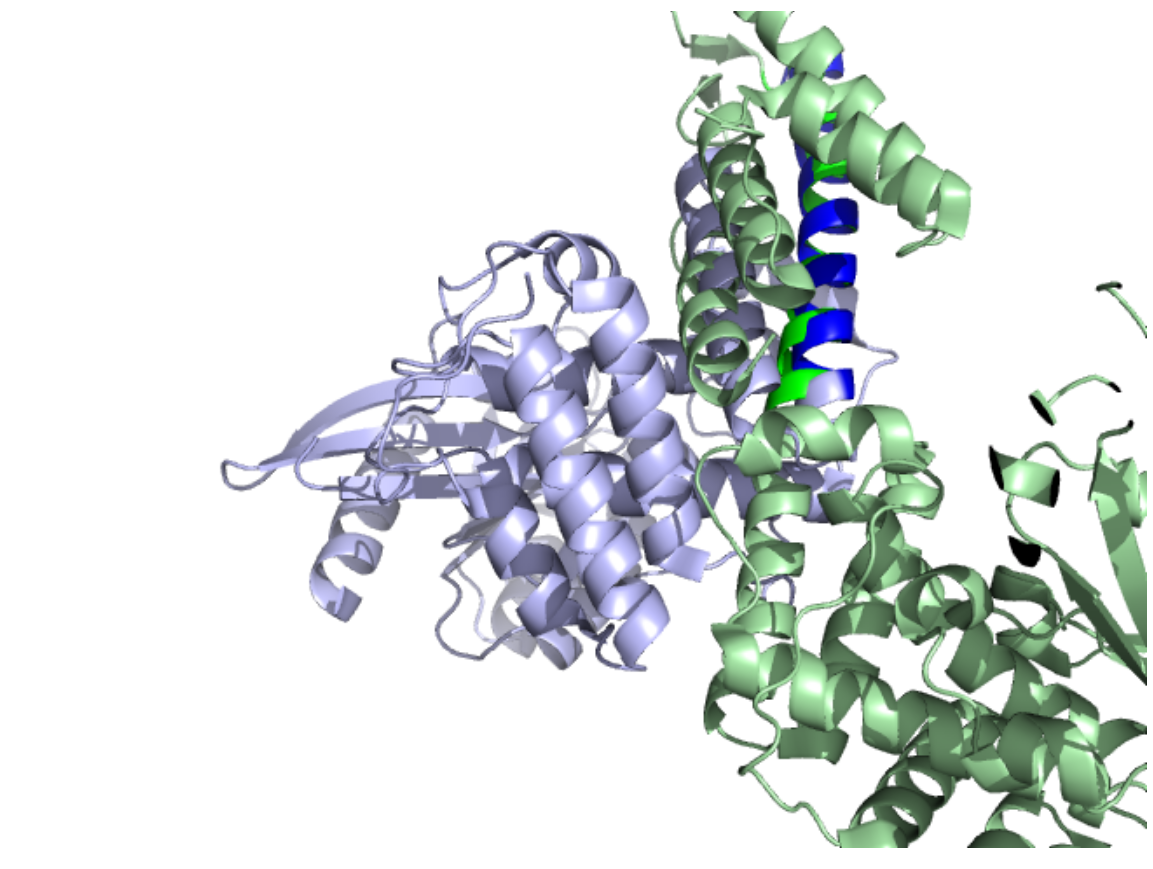

In [8]:
gen_pymol_session("3l0i", "2wwx", (319,343), (334,358))

In [9]:
df_sample=df[(df.pdb == "2bo3A01") |  (df.pdb == "3mlgA00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
599,mRcÄ/°KÖ/àσ═ªL■»dßσ╕¡z √¡Çs└}╨,2bo3A01,1,10,3350,30,59,12-92:A,41:70
600,mRcÄ/°KÖ/àσ═ªL■»dßσ╕¡z √¡Çs└}╨,3mlgA00,1,20,120,110,139,13-181:A,122:151


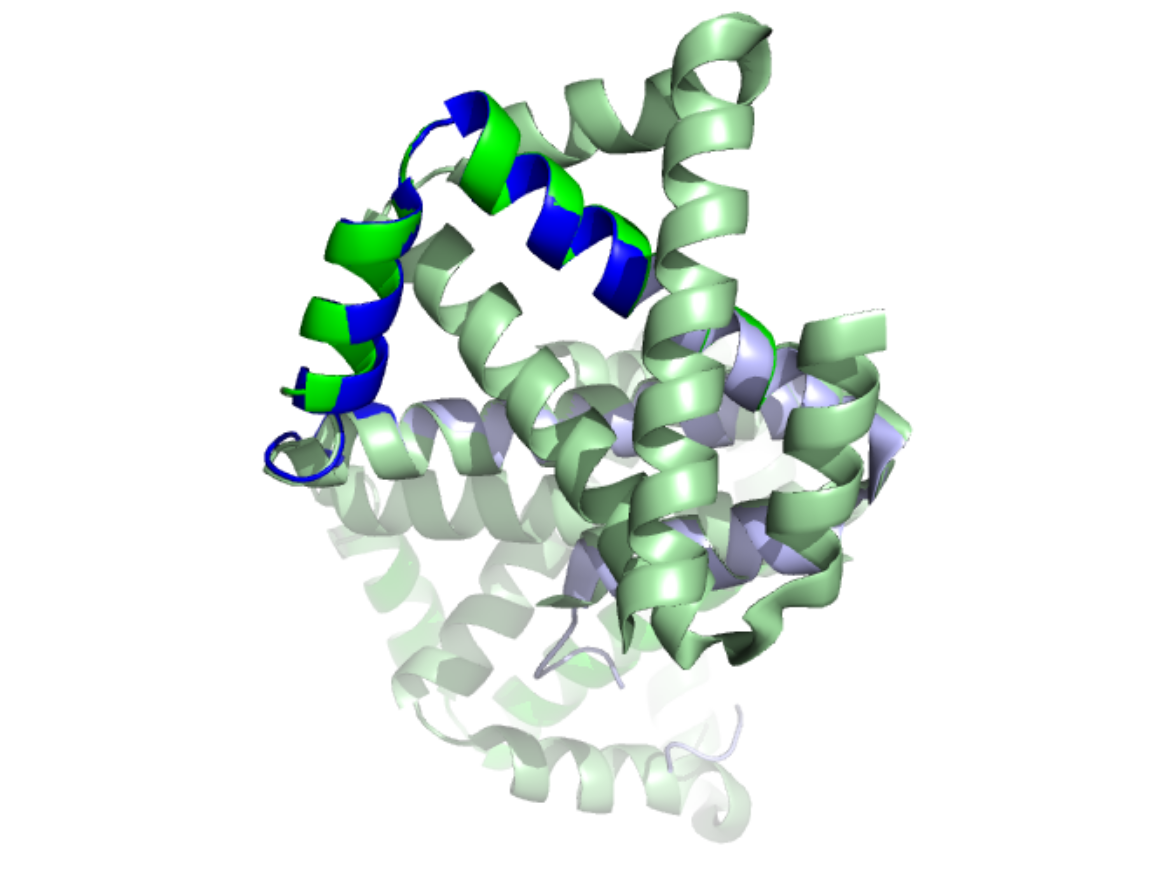

In [10]:
gen_pymol_session("3mlg", "2bo3", (122,151), (41,70))

In [11]:
df_sample=df[(df.pdb == "1i51B00") |  (df.pdb == "3k7eB00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
986,"J;26Σ,Qσ╠EßσëS■≤²╙<└µ\K▓ε3]╧ε3Σ",3k7eB00,3,40,50,152,183,32-290:B,183:214
985,"J;26Σ,Qσ╠EßσëS■≤²╙<└µ\K▓ε3]╧ε3Σ",1i51B00,3,30,70,29,60,212-303:B,240:271


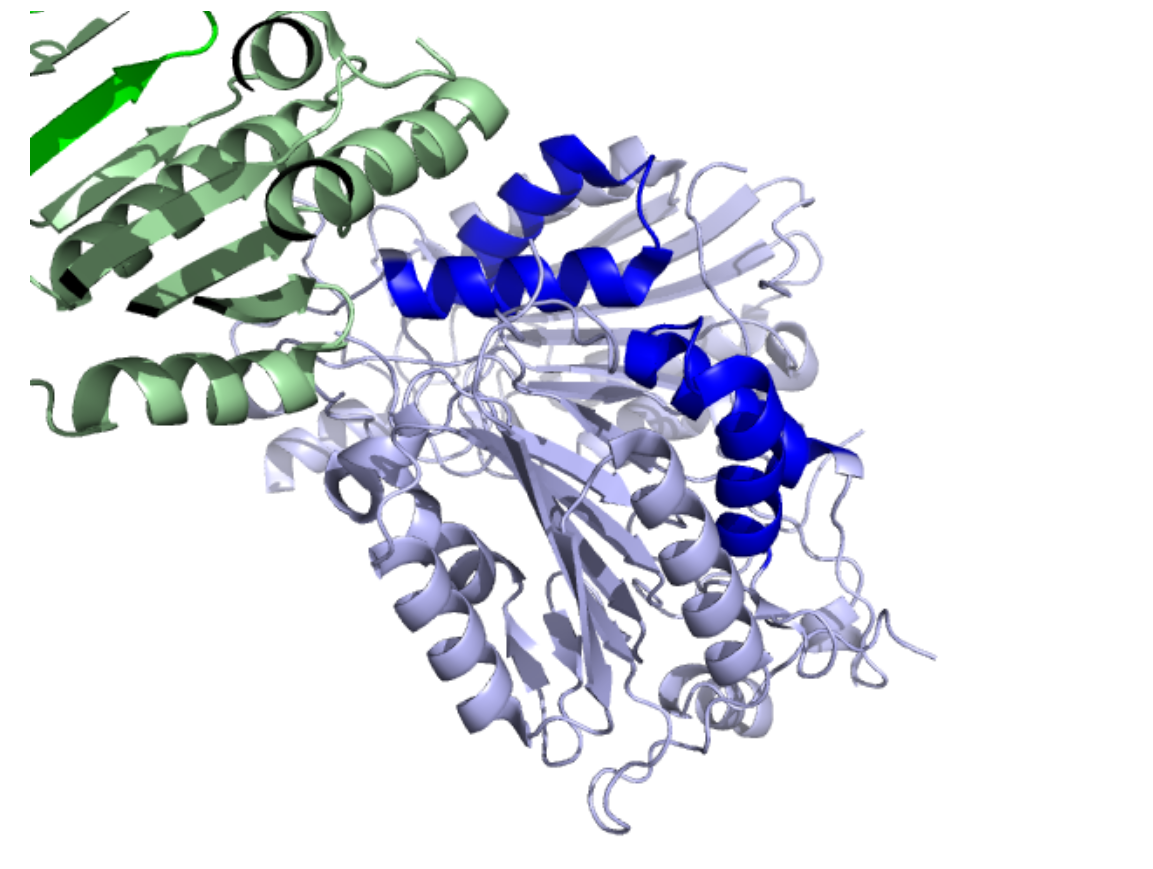

In [12]:
gen_pymol_session("3k7e", "1i51", (183,214),(240,271))

In [13]:
df_sample=df[(df.pdb == "1uqwA02") |  (df.pdb == "3t66A01") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
1228,▓e▓^á<I╛ZVá[╒U!╗ùd5F»'3╖nN¢ßα√≡▄ⁿ≈ ⁿ╤,1uqwA02,3,90,76,50,86,14-162:A,63:99
1229,▓e▓^á<I╛ZVá[╒U!╗ùd5F»'3╖nN¢ßα√≡▄ⁿ≈ ⁿ╤,3t66A01,3,40,190,59,95,"12-236:A,458-487:A",70:106


In [1]:
# gen_pymol_session("1uqw", "3t66", (63,99),(70,106))

In [15]:
df_sample=df[(df.pdb == "1u07B00") |  (df.pdb == "2k9kA00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
9659,║εä°Y&⌡V°H≤^∩=▄Θ▄!≤½≤▄,2k9kA00,3,30,1150,35,56,101-206:A,135:156
9658,║εä°Y&⌡V°H≤^∩=▄Θ▄!≤½≤▄,1u07B00,3,30,2420,18,39,152-239:B,169:190


In [2]:
# gen_pymol_session("2k9k", "1u07", (135,156), (169,190))

In [17]:
df_sample=df[(df.pdb == "2l33A00") |  (df.pdb == "2mioA00") ].sort_values(by="N", ascending=False)[0:2]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
9897,9!%%%%%%7%ⁿ≈,2l33A00,3,30,160,1,12,1-91:A,1:12
9898,9!%%%%%%7%ⁿ≈,2mioA00,2,30,30,1,12,1-70:A,1:12


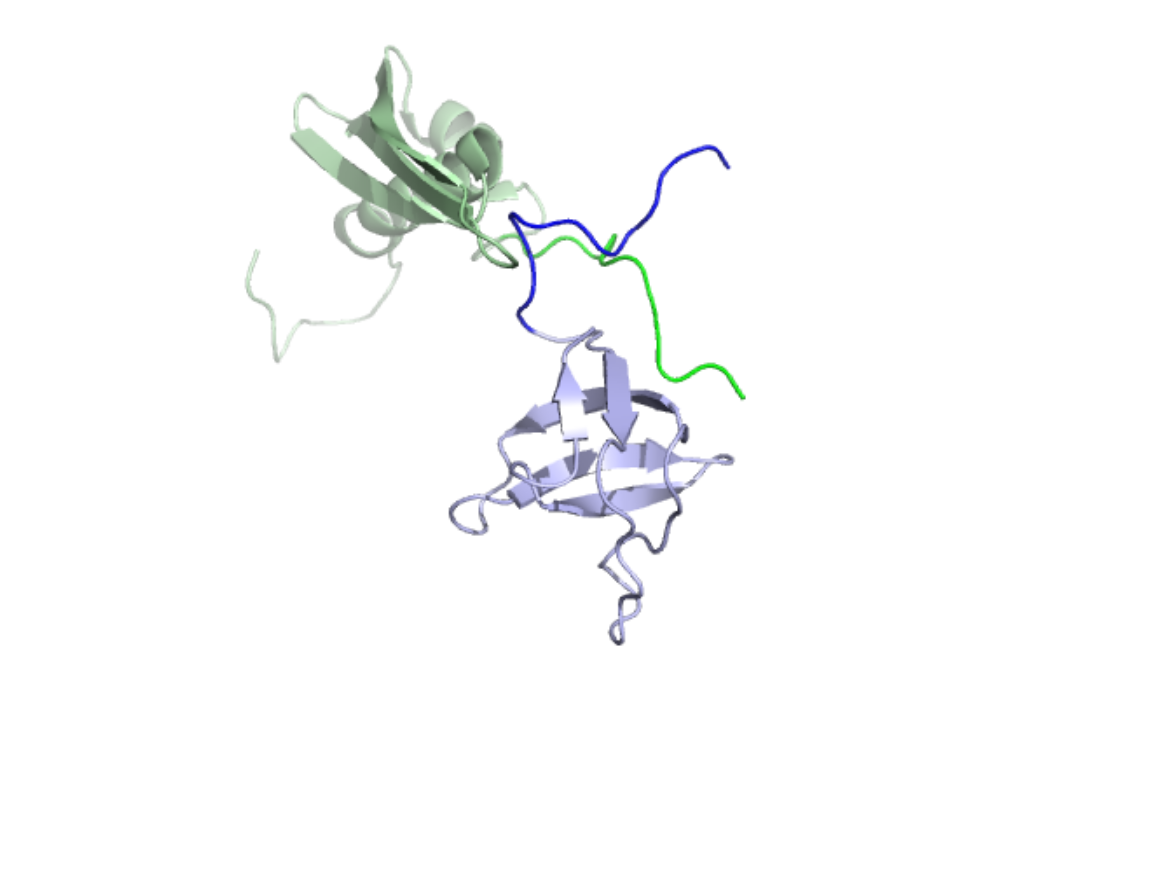

In [18]:
gen_pymol_session("2l33", "2mio", (1,12), (1,12))

In [19]:
df_sample=df[(df["index"]==18)].sort_values(by="N", ascending=False)[0:3]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
2376,!á─╗¥zm⌡êk╗,2a50C00,3,30,1300,34,44,4-62:C,37:47
2377,!á─╗¥zm⌡êk╗,4i2yA01,2,40,155,133,143,39-303:A,171:181
2378,!á─╗¥zm⌡êk╗,2fl1A00,2,40,155,37,47,4-231:A,40:50


In [3]:
# gen_pymol_session("2a50", "4i2y", (37,47), (171,181))

In [21]:
df_sample=df[(df["index"]==20)].sort_values(by="N", ascending=False)[0:3]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
6821,"!╒""EB░'½Φ╚E°",1dliA03,1,10,1040,54,65,205-294:A,258:269
6822,"!╒""EB░'½Φ╚E°",3g79A02,3,40,50,64,75,228-478:A,291:302
6823,"!╒""EB░'½Φ╚E°",3vtfA02,3,40,50,46,57,217-424:A,262:273


In [4]:
# gen_pymol_session("1dli", "3g79", (258,269),(291,302))

In [23]:
df_sample=df[(df["index"]==3589)].sort_values(by="N", ascending=False)[0:3]
df_sample[["hit", "pdb", "c", "a", "t","start","end", "pdb_interval", "hit_interval"]]

,hit,pdb,c,a,t,start,end,pdb_interval,hit_interval
3355,▄~]%=&?UX0j⌐⌡7,1qmoE01,3,30,720,20,33,132-215:E,151:164
3356,▄~]%=&?UX0j⌐⌡7,2b7yA00,2,60,120,133,146,2-182:A,134:147


In [5]:
# gen_pymol_session("1qmo", "2b7y", (151,164), (134,147))